# Exercises 1

### Explain in your own words: What is the the difference between the html page and the wiki-source

The HTML is the standard markup language for documents designed to be displayed in a web browser. A HTML page is a document which we can find on the web browser and is written in HTML.
Wikisource is an online wiki-based digital library.
The HTML page is only a document which can be found on the web browser. The Wikisource stores and organizes numorous HTML page in a graph structure, so that it can be find easily.

### What are the various parameters you can set for a query of the wikipedia api?

The parameters we can set for a query of the wikipedia api can be found here: https://www.mediawiki.org/wiki/API:Properties#revisions_.2F_rv

action, format, maxlag, smaxage, maxage, assert, assertuser, requestid, servedby, curtimestamp, responselanginfo, origin, crossorigin, uselang, varianterrorformat, errorlang, errorsuselocal, centralauthtoken

### Write your own little notebook to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages

In [8]:
import requests
import os
from urllib.parse import quote
import time
import json

class WikipediaDownloader:
    def __init__(self):
        self.base_url = "https://en.wikipedia.org/api/rest_v1/page/html/"
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })
    
    def download_page_html(self, title):
        try:
            # Clean the title for URL
            clean_title = quote(title.replace(' ', '_'))
            url = f"{self.base_url}{clean_title}"
            
            print(f"Downloading: {title}")
            response = self.session.get(url)
            response.raise_for_status()
            
            return response.text
        except requests.RequestException as e:
            print(f"Error downloading {title}: {e}")
            return None
    
    def save_page(self, title, content):
        if content is None:
            return False
        
        # Create directory if it doesn't exist
        os.makedirs("wikipedia_pages", exist_ok=True)
        
        # Clean filename
        safe_filename = "".join(c for c in title if c.isalnum() or c in (' ', '-', '_')).rstrip()
        filename = f"wikipedia_pages/{safe_filename}.html"
        
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(content)
            print(f"Saved: {filename}")
            return True
        except IOError as e:
            print(f"Error saving {title}: {e}")
            return False
    
    def download_and_save(self, title):
        content = self.download_page_html(title)
        
        if content:
            return self.save_page(title, content)
        return False

downloader = WikipediaDownloader()

favorite_pages = [
    "Artificial Intelligence",
    "Black Holes",
    "Leonardo da Vinci", 
    "Ancient Egypt"
]

for page_title in favorite_pages:
    print(f"\n--- Processing: {page_title} ---")
    
    # Download HTML version
    success_html = downloader.download_and_save(page_title)


--- Processing: Artificial Intelligence ---
Downloading: Artificial Intelligence
Saved: wikipedia_pages/Artificial Intelligence.html

--- Processing: Black Holes ---
Downloading: Black Holes
Saved: wikipedia_pages/Black Holes.html

--- Processing: Leonardo da Vinci ---
Downloading: Leonardo da Vinci
Saved: wikipedia_pages/Leonardo da Vinci.html

--- Processing: Ancient Egypt ---
Downloading: Ancient Egypt
Saved: wikipedia_pages/Ancient Egypt.html


---
# Exercises 2

### List three different real networks and state the nodes and links for each of them.

* Facebook connections
    * *Nodes*: People
    * *Links*: Friendlist
* Internet
    * *Nodes*: Routers and Switches
    * *Links*: Network cable
* Public transportation system
    * *Nodes*: Stations
    * *Links*: Roads

### Tell us of the network you are personally most interested in (a fourth one). Address the following questions:
* What are its nodes and links?
* How large is it?
* Can be mapped out?
* Does it evolve over time?
* Are there processes occurring ON the network? (information spreading, for example)
* Why do you care about it?

Family tree
* Nodes: people
* It is very large (?). It depends on how much we go back in time
* Yes, it can be mapped out.
* Yes, it evolves every time someone has a child or gets married
* DNA spreading occuers between parent and child nodes.
* I care about it because it is interesting to see where your family originally came from. It is also interesting to see where your family members were during the time of big historical events.

### In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.

In my opinion network science can have the biggest impact in the area of Graph Neural Networks, where we try to train neural networks on graph data structures.

---
# Exercises 3


### Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). The goal of this exercise is to create your own Notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.

In [9]:
import networkx as nx
G = nx.Graph()

In [11]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

In [12]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [13]:
G.clear()

In [14]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [15]:
G.number_of_nodes()

8

In [16]:
G.number_of_edges()

3

In [17]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [18]:
list(G.nodes)
list(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
G.degree[1] 
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [19]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

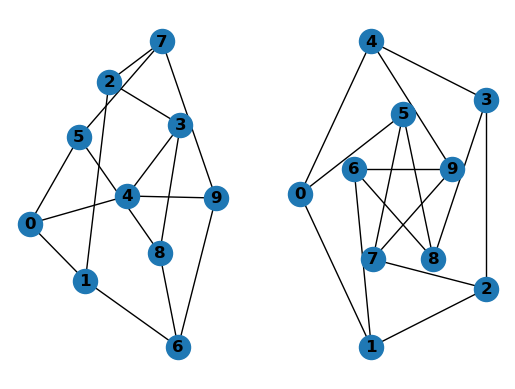

In [20]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [21]:
FamilyGraph = nx.Graph()
FamilyGraph.add_node(1)